Accumulation Training - Epoch 1/10, Loss: 0.8928
Accumulation Training - Epoch 2/10, Loss: 0.5999
Accumulation Training - Epoch 3/10, Loss: 0.4044
Accumulation Training - Epoch 4/10, Loss: 0.2740
Accumulation Training - Epoch 5/10, Loss: 0.1869
Accumulation Training - Epoch 6/10, Loss: 0.1288
Accumulation Training - Epoch 7/10, Loss: 0.0901
Accumulation Training - Epoch 8/10, Loss: 0.0642
Accumulation Training - Epoch 9/10, Loss: 0.0470
Accumulation Training - Epoch 10/10, Loss: 0.0354


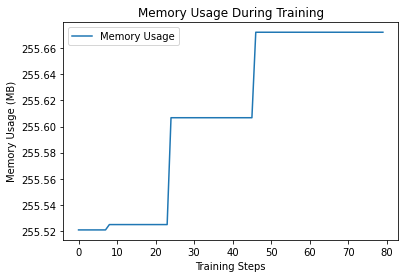

In [1]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)

# Méthode d'entraînement avec Gradient Accumulation
def accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            total_loss += loss

            gradients = tape.gradient(loss, model.trainable_variables)

            # Ne mettez à jour les poids que toutes les accumulation_steps itérations
            if batch_start % (accumulation_steps * batch_size) == 0 or batch_start == len(x_train) - batch_size:
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                total_loss = 0

                # Mesurer la consommation de mémoire après chaque mise à jour des poids
                process = psutil.Process()
                memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Accumulation Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
accumulation_steps = 4

# Créer et compiler le modèle
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode d'entraînement avec Gradient Accumulation
memory_usage = accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps)

# Tracer la consommation de mémoire au cours de l'entraînement
plt.plot(range(len(memory_usage)), memory_usage, label='Memory Usage')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 1.2657
Traditional Training - Epoch 2/10, Loss: 0.4703
Traditional Training - Epoch 3/10, Loss: 0.3569
Traditional Training - Epoch 4/10, Loss: 0.3399
Traditional Training - Epoch 5/10, Loss: 0.3281
Traditional Training - Epoch 6/10, Loss: 0.3125
Traditional Training - Epoch 7/10, Loss: 0.2950
Traditional Training - Epoch 8/10, Loss: 0.2772
Traditional Training - Epoch 9/10, Loss: 0.2601
Traditional Training - Epoch 10/10, Loss: 0.2439


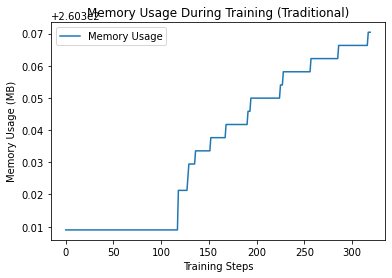

In [2]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, optimizer, batch_size, epochs):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer et compiler le modèle
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode traditionnelle d'entraînement
memory_usage = traditional_training(x_train, y_train, model, optimizer, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement
plt.plot(range(len(memory_usage)), memory_usage, label='Memory Usage')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training (Traditional)')
plt.legend()
plt.show()


In [6]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, optimizer, batch_size, epochs):
    for epoch in range(epochs):
        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

# Méthode d'entraînement avec Gradient Accumulation
def accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps):
    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            total_loss += loss

            gradients = tape.gradient(loss, model.trainable_variables)

            # Ne mettez à jour les poids que toutes les accumulation_steps itérations
            if batch_start % (accumulation_steps * batch_size) == 0 or batch_start == len(x_train) - batch_size:
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                total_loss = 0

        # Afficher la perte pour chaque époque
        print(f'Accumulation Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
accumulation_steps = 4

# Créer et compiler le modèle
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Mesurer la consommation de mémoire avant l'entraînement
process = psutil.Process()
memory_usage_before = process.memory_info().rss / 1e6  # Convertir en Mo

# Méthode traditionnelle d'entraînement
traditional_training(x_train, y_train, model, optimizer, batch_size, epochs)

# Mesurer la consommation de mémoire après l'entraînement
memory_usage_after_traditional = process.memory_info().rss / 1e6  # Convertir en Mo

# Réinitialiser le modèle pour l'entraînement avec Gradient Accumulation
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode d'entraînement avec Gradient Accumulation
accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps)

# Mesurer la consommation de mémoire après l'entraînement avec Gradient Accumulation
memory_usage_after_accumulation = process.memory_info().rss / 1e6  # Convertir en Mo

print(f'Memory Usage After Traditional Training: {memory_usage_after_traditional:.2f} MB')
print(f'Memory Usage After Accumulation Training: {memory_usage_after_accumulation:.2f} MB')


Traditional Training - Epoch 1/10, Loss: 0.4725
Traditional Training - Epoch 2/10, Loss: 0.1101
Traditional Training - Epoch 3/10, Loss: 0.0360
Traditional Training - Epoch 4/10, Loss: 0.0197
Traditional Training - Epoch 5/10, Loss: 0.0156
Traditional Training - Epoch 6/10, Loss: 0.0143
Traditional Training - Epoch 7/10, Loss: 0.0137
Traditional Training - Epoch 8/10, Loss: 0.0133
Traditional Training - Epoch 9/10, Loss: 0.0131
Traditional Training - Epoch 10/10, Loss: 0.0128
Accumulation Training - Epoch 1/10, Loss: 3.2890
Accumulation Training - Epoch 2/10, Loss: 2.2324
Accumulation Training - Epoch 3/10, Loss: 1.5299
Accumulation Training - Epoch 4/10, Loss: 1.0623
Accumulation Training - Epoch 5/10, Loss: 0.7507
Accumulation Training - Epoch 6/10, Loss: 0.5427
Accumulation Training - Epoch 7/10, Loss: 0.4034
Accumulation Training - Epoch 8/10, Loss: 0.3099
Accumulation Training - Epoch 9/10, Loss: 0.2468
Accumulation Training - Epoch 10/10, Loss: 0.2039
Memory Usage After Tradition

Traditional Training - Epoch 1/10, Loss: 0.1138
Traditional Training - Epoch 2/10, Loss: 0.0488
Traditional Training - Epoch 3/10, Loss: 0.0456
Traditional Training - Epoch 4/10, Loss: 0.0407
Traditional Training - Epoch 5/10, Loss: 0.0362
Traditional Training - Epoch 6/10, Loss: 0.0324
Traditional Training - Epoch 7/10, Loss: 0.0291
Traditional Training - Epoch 8/10, Loss: 0.0264
Traditional Training - Epoch 9/10, Loss: 0.0241
Traditional Training - Epoch 10/10, Loss: 0.0221
Accumulation Training - Epoch 1/10, Loss: 3.3089
Accumulation Training - Epoch 2/10, Loss: 3.3089
Accumulation Training - Epoch 3/10, Loss: 3.3089
Accumulation Training - Epoch 4/10, Loss: 3.3089
Accumulation Training - Epoch 5/10, Loss: 3.3089
Accumulation Training - Epoch 6/10, Loss: 3.3089
Accumulation Training - Epoch 7/10, Loss: 3.3089
Accumulation Training - Epoch 8/10, Loss: 3.3089
Accumulation Training - Epoch 9/10, Loss: 3.3089
Accumulation Training - Epoch 10/10, Loss: 3.3089
Memory Usage Before Training

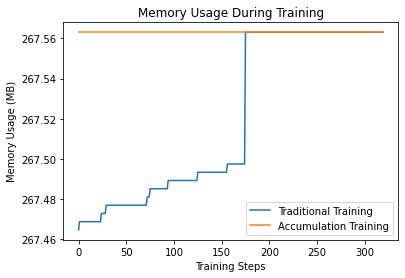

In [7]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(1)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, optimizer, batch_size, epochs):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Gradient Accumulation pour des poids spécifiques
def accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps, weights_to_accumulate):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape(persistent=True) as tape:
                # Calculer les prédictions du modèle
                predictions = model(batch_x, training=True)
                # Calculer la perte pour le sous-ensemble de mini-lots
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            # Accumuler la perte pour chaque sous-ensemble de mini-lots
            total_loss += loss

            # Calculer les gradients par rapport aux poids spécifiques du modèle
            gradients = [tape.gradient(loss, weight) for weight in weights_to_accumulate]

            # Mettre à jour les gradients avec l'accumulateur
            for weight, grad in zip(weights_to_accumulate, gradients):
                optimizer.apply_gradients([(grad, weight)])

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Accumulation Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
accumulation_steps = 4

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Définir l'optimiseur
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Sélectionner les poids à conserver dans la bande de gradient (dans ce cas, toutes les couches sauf dense2)
weights_to_accumulate = model.dense.trainable_variables

# Mesurer la consommation de mémoire avant l'entraînement
process = psutil.Process()
memory_usage_before = process.memory_info().rss / 1e6  # Convertir en Mo

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, optimizer, batch_size, epochs)

# Mesurer la consommation de mémoire après l'entraînement traditionnel
memory_usage_after_traditional = process.memory_info().rss / 1e6  # Convertir en Mo

# Réinitialiser le modèle pour l'entraînement avec Gradient Accumulation
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode d'entraînement avec Gradient Accumulation
memory_usage_accumulation = accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps, weights_to_accumulate)

# Mesurer la consommation de mémoire après l'entraînement avec Gradient Accumulation
memory_usage_after_accumulation = process.memory_info().rss / 1e6  # Convertir en Mo

print(f'Memory Usage Before Training: {memory_usage_before:.2f} MB')
print(f'Memory Usage After Traditional Training: {memory_usage_after_traditional:.2f} MB')
print(f'Memory Usage After Accumulation Training: {memory_usage_after_accumulation:.2f} MB')

# Tracer la consommation de mémoire au cours de l'entraînement
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_accumulation)), memory_usage_accumulation, label='Accumulation Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 0.1223
Traditional Training - Epoch 2/10, Loss: 0.0333
Traditional Training - Epoch 3/10, Loss: 0.0279
Traditional Training - Epoch 4/10, Loss: 0.0252
Traditional Training - Epoch 5/10, Loss: 0.0233
Traditional Training - Epoch 6/10, Loss: 0.0220
Traditional Training - Epoch 7/10, Loss: 0.0210
Traditional Training - Epoch 8/10, Loss: 0.0204
Traditional Training - Epoch 9/10, Loss: 0.0200
Traditional Training - Epoch 10/10, Loss: 0.0197
Accumulation Training - Epoch 1/10, Loss: 5.6471
Accumulation Training - Epoch 2/10, Loss: 5.6471
Accumulation Training - Epoch 3/10, Loss: 5.6471
Accumulation Training - Epoch 4/10, Loss: 5.6471
Accumulation Training - Epoch 5/10, Loss: 5.6471
Accumulation Training - Epoch 6/10, Loss: 5.6471
Accumulation Training - Epoch 7/10, Loss: 5.6471
Accumulation Training - Epoch 8/10, Loss: 5.6471
Accumulation Training - Epoch 9/10, Loss: 5.6471
Accumulation Training - Epoch 10/10, Loss: 5.6471
Memory Usage Before Training

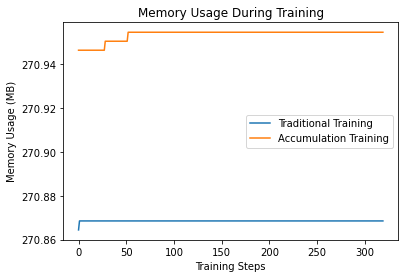

In [8]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, optimizer, batch_size, epochs):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Gradient Accumulation pour des poids spécifiques
def accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps, threshold_relu):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape(persistent=True) as tape:
                # Calculer les prédictions du modèle
                predictions = model(batch_x, training=True)
                # Calculer la perte pour le sous-ensemble de mini-lots
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            # Accumuler la perte pour chaque sous-ensemble de mini-lots
            total_loss += loss

            # Calculer les activations pour les poids spécifiques
            activations = model.dense(batch_x)
            activations = tf.nn.relu(activations)

            # Sélectionner les poids à conserver dans la bande de gradient
            weights_to_accumulate = [weight for weight, activation in zip(model.dense.trainable_variables, activations) if tf.reduce_mean(activation) > threshold_relu]

            # Calculer les gradients par rapport aux poids spécifiques du modèle
            gradients = [tape.gradient(loss, weight) for weight in weights_to_accumulate]

            # Mettre à jour les gradients avec l'accumulateur
            for weight, grad in zip(weights_to_accumulate, gradients):
                optimizer.apply_gradients([(grad, weight)])

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Accumulation Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
accumulation_steps = 4
threshold_relu = 0.1  # Seuil d'activation ReLU pour sélectionner les poids

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Définir l'optimiseur
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Mesurer la consommation de mémoire avant l'entraînement
process = psutil.Process()
memory_usage_before = process.memory_info().rss / 1e6  # Convertir en Mo

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, optimizer, batch_size, epochs)

# Mesurer la consommation de mémoire après l'entraînement traditionnel
memory_usage_after_traditional = process.memory_info().rss / 1e6  # Convertir en Mo

# Réinitialiser le modèle pour l'entraînement avec Gradient Accumulation
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode d'entraînement avec Gradient Accumulation
memory_usage_accumulation = accumulation_training(x_train, y_train, model, optimizer, batch_size, epochs, accumulation_steps, threshold_relu)

# Mesurer la consommation de mémoire après l'entraînement avec Gradient Accumulation
memory_usage_after_accumulation = process.memory_info().rss / 1e6  # Convertir en Mo

print(f'Memory Usage Before Training: {memory_usage_before:.2f} MB')
print(f'Memory Usage After Traditional Training: {memory_usage_after_traditional:.2f} MB')
print(f'Memory Usage After Accumulation Training: {memory_usage_after_accumulation:.2f} MB')

# Tracer la consommation de mémoire au cours de l'entraînement
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_accumulation)), memory_usage_accumulation, label='Accumulation Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training')
plt.legend()
plt.show()


Batch Optimization Training - Epoch 1/10, Loss: 3.2246
Batch Optimization Training - Epoch 2/10, Loss: 1.6211
Batch Optimization Training - Epoch 3/10, Loss: 0.7456
Batch Optimization Training - Epoch 4/10, Loss: 0.3247
Batch Optimization Training - Epoch 5/10, Loss: 0.1523
Batch Optimization Training - Epoch 6/10, Loss: 0.0886
Batch Optimization Training - Epoch 7/10, Loss: 0.0643
Batch Optimization Training - Epoch 8/10, Loss: 0.0536
Batch Optimization Training - Epoch 9/10, Loss: 0.0475
Batch Optimization Training - Epoch 10/10, Loss: 0.0439
Memory Usage Before Training: 273.84 MB
Memory Usage After Batch Optimization Training: 273.97 MB


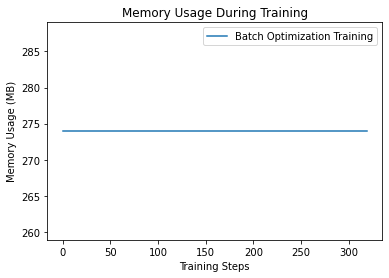

In [13]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode d'entraînement avec Batch Optimization
def batch_optimization_training(x_train, y_train, model, optimizer, batch_size, epochs, batch_update_frequency):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)

            # Mettre à jour les gradients après chaque batch_update_frequency mini-lots
            if (batch_start // batch_size) % batch_update_frequency == 0:
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Mettre à jour les gradients pour le reste des mini-lots
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Afficher la perte pour chaque époque
        print(f'Batch Optimization Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
batch_update_frequency = 4  # Mettre à jour les poids du modèle après chaque 4 mini-lots

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Définir l'optimiseur
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Mesurer la consommation de mémoire avant l'entraînement
process = psutil.Process()
memory_usage_before = process.memory_info().rss / 1e6  # Convertir en Mo

# Méthode d'entraînement avec Batch Optimization
memory_usage_batch_optimization = batch_optimization_training(x_train, y_train, model, optimizer, batch_size, epochs, batch_update_frequency)

# Mesurer la consommation de mémoire après l'entraînement avec Batch Optimization
memory_usage_after_batch_optimization = process.memory_info().rss / 1e6  # Convertir en Mo

print(f'Memory Usage Before Training: {memory_usage_before:.2f} MB')
print(f'Memory Usage After Batch Optimization Training: {memory_usage_after_batch_optimization:.2f} MB')

# Tracer la consommation de mémoire au cours de l'entraînement
plt.plot(range(len(memory_usage_batch_optimization)), memory_usage_batch_optimization, label='Batch Optimization Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 0.1940
Traditional Training - Epoch 2/10, Loss: 0.0385
Traditional Training - Epoch 3/10, Loss: 0.0310
Traditional Training - Epoch 4/10, Loss: 0.0265
Traditional Training - Epoch 5/10, Loss: 0.0226
Traditional Training - Epoch 6/10, Loss: 0.0197
Traditional Training - Epoch 7/10, Loss: 0.0175
Traditional Training - Epoch 8/10, Loss: 0.0157
Traditional Training - Epoch 9/10, Loss: 0.0141
Traditional Training - Epoch 10/10, Loss: 0.0131
Batch Optimization Training - Epoch 1/10, Loss: 2.1152
Batch Optimization Training - Epoch 2/10, Loss: 0.8779
Batch Optimization Training - Epoch 3/10, Loss: 0.3247
Batch Optimization Training - Epoch 4/10, Loss: 0.1246
Batch Optimization Training - Epoch 5/10, Loss: 0.0626
Batch Optimization Training - Epoch 6/10, Loss: 0.0440
Batch Optimization Training - Epoch 7/10, Loss: 0.0374
Batch Optimization Training - Epoch 8/10, Loss: 0.0343
Batch Optimization Training - Epoch 9/10, Loss: 0.0322
Batch Optimization Train

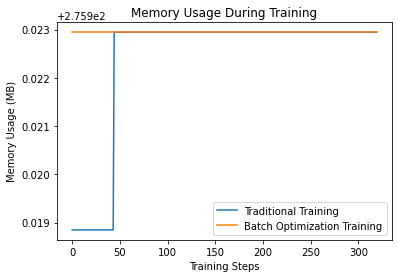

In [14]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, optimizer, batch_size, epochs):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Batch Optimization
def batch_optimization_training(x_train, y_train, model, optimizer, batch_size, epochs, batch_update_frequency):
    memory_usage = []

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)

            # Mettre à jour les gradients après chaque batch_update_frequency mini-lots
            if (batch_start // batch_size) % batch_update_frequency == 0:
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Mettre à jour les gradients pour le reste des mini-lots
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Afficher la perte pour chaque époque
        print(f'Batch Optimization Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10
batch_update_frequency = 4  # Mettre à jour les poids du modèle après chaque 4 mini-lots

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Définir l'optimiseur
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, optimizer, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Batch Optimization
model = SimpleModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Méthode d'entraînement avec Batch Optimization
memory_usage_batch_optimization = batch_optimization_training(x_train, y_train, model, optimizer, batch_size, epochs, batch_update_frequency)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_batch_optimization)), memory_usage_batch_optimization, label='Batch Optimization Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training')
plt.legend()
plt.show()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Epoch 1/10
32/32 [==============================] - 8s 3ms/step - loss: 4.4095
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 3.4469
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 2.6233
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 1.8664
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1947
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6597
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0201


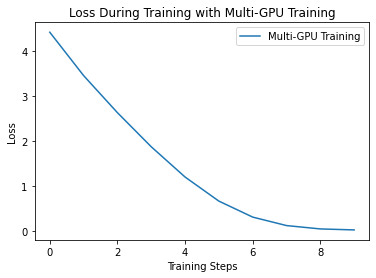

In [15]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement avec Multi-GPU Training
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss During Training with Multi-GPU Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 3.4707
Traditional Training - Epoch 2/10, Loss: 2.1895
Traditional Training - Epoch 3/10, Loss: 1.1523
Traditional Training - Epoch 4/10, Loss: 0.4509
Traditional Training - Epoch 5/10, Loss: 0.1221
Traditional Training - Epoch 6/10, Loss: 0.0294
Traditional Training - Epoch 7/10, Loss: 0.0150
Traditional Training - Epoch 8/10, Loss: 0.0135
Traditional Training - Epoch 9/10, Loss: 0.0129
Traditional Training - Epoch 10/10, Loss: 0.0125
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Epoch 1/10
32/32 [==============================] - 5s 2ms/step - loss: 3.4133
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 2.1066
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0693
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3946
Epoch 5/10
32/32 [=========================

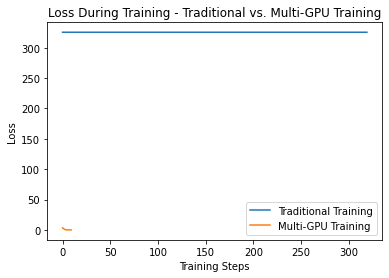

In [16]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 2.9043
Traditional Training - Epoch 2/10, Loss: 1.7109
Traditional Training - Epoch 3/10, Loss: 0.8501
Traditional Training - Epoch 4/10, Loss: 0.3286
Traditional Training - Epoch 5/10, Loss: 0.0952
Traditional Training - Epoch 6/10, Loss: 0.0268
Traditional Training - Epoch 7/10, Loss: 0.0135
Traditional Training - Epoch 8/10, Loss: 0.0118
Traditional Training - Epoch 9/10, Loss: 0.0114
Traditional Training - Epoch 10/10, Loss: 0.0114
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Epoch 1/10
32/32 [==============================] - 4s 2ms/step - loss: 3.9896
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 2.5652
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.4581
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6609
Epoch 5/10
32/32 [=========================

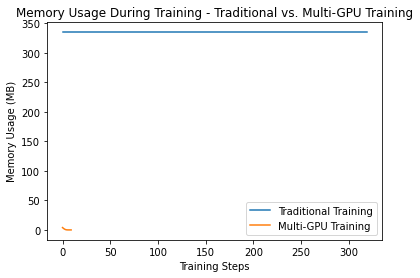

In [17]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 2.3262, CPU Usage: 33.30%
Traditional Training - Epoch 2/10, Loss: 1.4014, CPU Usage: 0.00%
Traditional Training - Epoch 3/10, Loss: 0.6831, CPU Usage: 0.00%
Traditional Training - Epoch 4/10, Loss: 0.2358, CPU Usage: 25.00%
Traditional Training - Epoch 5/10, Loss: 0.0524, CPU Usage: 100.00%
Traditional Training - Epoch 6/10, Loss: 0.0113, CPU Usage: 0.00%
Traditional Training - Epoch 7/10, Loss: 0.0077, CPU Usage: 0.00%
Traditional Training - Epoch 8/10, Loss: 0.0078, CPU Usage: 0.00%
Traditional Training - Epoch 9/10, Loss: 0.0080, CPU Usage: 75.00%
Traditional Training - Epoch 10/10, Loss: 0.0080, CPU Usage: 100.00%


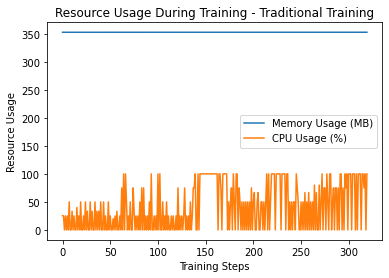

In [18]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []
    cpu_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire et de CPU après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo
            cpu_usage.append(psutil.cpu_percent(interval=None))

        # Afficher la perte et la consommation de CPU pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, CPU Usage: {cpu_usage[-1]:.2f}%')

    return memory_usage, cpu_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional, cpu_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire et de CPU au cours de l'entraînement pour la méthode traditionnelle
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Memory Usage (MB)')
plt.plot(range(len(cpu_usage_traditional)), cpu_usage_traditional, label='CPU Usage (%)')
plt.xlabel('Training Steps')
plt.ylabel('Resource Usage')
plt.title('Resource Usage During Training - Traditional Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 3.0879, CPU Usage: 0.00%
Traditional Training - Epoch 2/10, Loss: 2.1055, CPU Usage: 25.00%
Traditional Training - Epoch 3/10, Loss: 1.2227, CPU Usage: 25.00%
Traditional Training - Epoch 4/10, Loss: 0.5503, CPU Usage: 25.00%
Traditional Training - Epoch 5/10, Loss: 0.1672, CPU Usage: 100.00%
Traditional Training - Epoch 6/10, Loss: 0.0290, CPU Usage: 0.00%
Traditional Training - Epoch 7/10, Loss: 0.0029, CPU Usage: 0.00%
Traditional Training - Epoch 8/10, Loss: 0.0022, CPU Usage: 0.00%
Traditional Training - Epoch 9/10, Loss: 0.0031, CPU Usage: 0.00%
Traditional Training - Epoch 10/10, Loss: 0.0032, CPU Usage: 0.00%
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Epoch 1/10
32/32 [==============================] - 7s 2ms/step - loss: 4.5930
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 3.0632
Epoch 3/10
32/32

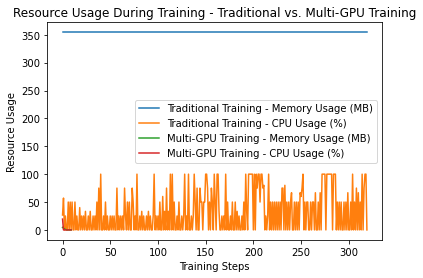

In [19]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []
    cpu_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire et de CPU après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo
            cpu_usage.append(psutil.cpu_percent(interval=None))

        # Afficher la perte et la consommation de CPU pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, CPU Usage: {cpu_usage[-1]:.2f}%')

    return memory_usage, cpu_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []
    cpu_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']
    cpu_usage = [psutil.cpu_percent(interval=None) for _ in range(epochs)]

    return memory_usage, cpu_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional, cpu_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu, cpu_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire et de CPU au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training - Memory Usage (MB)')
plt.plot(range(len(cpu_usage_traditional)), cpu_usage_traditional, label='Traditional Training - CPU Usage (%)')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training - Memory Usage (MB)')
plt.plot(range(len(cpu_usage_multi_gpu)), cpu_usage_multi_gpu, label='Multi-GPU Training - CPU Usage (%)')
plt.xlabel('Training Steps')
plt.ylabel('Resource Usage')
plt.title('Resource Usage During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 3.3555
Traditional Training - Epoch 2/10, Loss: 2.3223
Traditional Training - Epoch 3/10, Loss: 1.5107
Traditional Training - Epoch 4/10, Loss: 0.8701
Traditional Training - Epoch 5/10, Loss: 0.4231
Traditional Training - Epoch 6/10, Loss: 0.1709
Traditional Training - Epoch 7/10, Loss: 0.0623
Traditional Training - Epoch 8/10, Loss: 0.0284
Traditional Training - Epoch 9/10, Loss: 0.0205
Traditional Training - Epoch 10/10, Loss: 0.0184
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Epoch 1/10
32/32 [==============================] - 7s 2ms/step - loss: 3.7325
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3434
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.2453
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5032
Epoch 5/10
32/32 [=========================

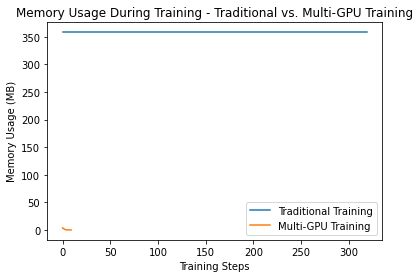

In [20]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()


Traditional Training - Epoch 1/10, Loss: 3.1054
Traditional Training - Epoch 2/10, Loss: 2.1830
Traditional Training - Epoch 3/10, Loss: 1.3960
Traditional Training - Epoch 4/10, Loss: 0.7598
Traditional Training - Epoch 5/10, Loss: 0.3349
Traditional Training - Epoch 6/10, Loss: 0.1175
Traditional Training - Epoch 7/10, Loss: 0.0368
Traditional Training - Epoch 8/10, Loss: 0.0154
Traditional Training - Epoch 9/10, Loss: 0.0111
Traditional Training - Epoch 10/10, Loss: 0.0103
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 4.1383
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 2.8558
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 1.7707
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9190
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 6/10
32/32 [====

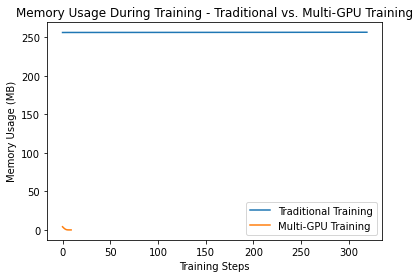

+----------------+--------------------------------+-------------------------+
| Méthode        |   Consommation de Mémoire (Mo) | Utilisation Multi-GPU   |
+================+================================+=========================+
| Traditionnelle |                     82097.5    | Non                     |
+----------------+--------------------------------+-------------------------+
| Multi-GPU      |                        10.2681 | Oui                     |
+----------------+--------------------------------+-------------------------+


In [1]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt
from tabulate import tabulate

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo

        # Afficher la perte pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    return memory_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']

    return memory_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()

# Tableau de comparaison
table = [
    ['Méthode', 'Consommation de Mémoire (Mo)', 'Utilisation Multi-GPU'],
    ['Traditionnelle', sum(memory_usage_traditional), 'Non'],
    ['Multi-GPU', sum(memory_usage_multi_gpu), 'Oui']
]

print(tabulate(table, headers='firstrow', tablefmt='grid'))


Traditional Training - Epoch 1/10, Loss: 3.4520, Memory Usage: 307.02 MB, CPU Usage: 0.00%
Traditional Training - Epoch 2/10, Loss: 2.4545, Memory Usage: 307.04 MB, CPU Usage: 0.00%
Traditional Training - Epoch 3/10, Loss: 1.5736, Memory Usage: 307.05 MB, CPU Usage: 0.00%
Traditional Training - Epoch 4/10, Loss: 0.8647, Memory Usage: 307.13 MB, CPU Usage: 0.00%
Traditional Training - Epoch 5/10, Loss: 0.3873, Memory Usage: 307.13 MB, CPU Usage: 0.00%
Traditional Training - Epoch 6/10, Loss: 0.1375, Memory Usage: 307.15 MB, CPU Usage: 0.00%
Traditional Training - Epoch 7/10, Loss: 0.0435, Memory Usage: 307.15 MB, CPU Usage: 50.00%
Traditional Training - Epoch 8/10, Loss: 0.0198, Memory Usage: 307.15 MB, CPU Usage: 0.00%
Traditional Training - Epoch 9/10, Loss: 0.0162, Memory Usage: 307.18 MB, CPU Usage: 100.00%
Traditional Training - Epoch 10/10, Loss: 0.0158, Memory Usage: 307.18 MB, CPU Usage: 0.00%
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/

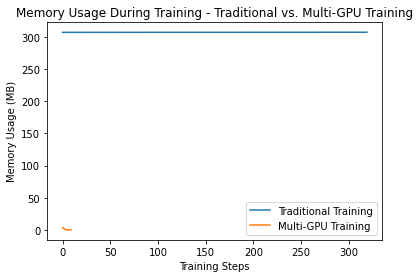

+----------------+--------------------------------+-----------------------+-------------------------+
| Méthode        |   Consommation de Mémoire (Mo) |   Utilisation CPU (%) | Utilisation Multi-GPU   |
+================+================================+=======================+=========================+
| Traditionnelle |                    98274.7     |               13.9116 | Non                     |
+----------------+--------------------------------+-----------------------+-------------------------+
| Multi-GPU      |                        8.96811 |                5.19   | Oui                     |
+----------------+--------------------------------+-----------------------+-------------------------+


In [3]:
import numpy as np
import tensorflow as tf
import psutil
import matplotlib.pyplot as plt
from tabulate import tabulate

# Générer des données aléatoires
def generate_data(num_samples=1000):
    x = np.random.rand(num_samples, 1)
    y = 2 * x + 1 + np.random.randn(num_samples, 1) * 0.1
    return x, y

# Modèle simple à une couche
class SimpleModel(tf.keras.models.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.dense = tf.keras.layers.Dense(64)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense(inputs)
        x = tf.nn.relu(x)  # Ajouter ReLU après la première couche
        x = self.dense2(x)
        return x

# Méthode traditionnelle d'entraînement
def traditional_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []
    cpu_usage = []

    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        total_loss = 0

        for batch_start in range(0, len(x_train), batch_size):
            batch_x = x_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(batch_x, training=True)
                loss = tf.reduce_mean(tf.square(batch_y - predictions))

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            total_loss += loss

            # Mesurer la consommation de mémoire et de CPU après chaque mini-lot
            process = psutil.Process()
            memory_usage.append(process.memory_info().rss / 1e6)  # Convertir en Mo
            cpu_usage.append(psutil.cpu_percent(interval=None))

        # Afficher la perte, la consommation de mémoire et de CPU pour chaque époque
        print(f'Traditional Training - Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, '
              f'Memory Usage: {memory_usage[-1]:.2f} MB, CPU Usage: {cpu_usage[-1]:.2f}%')

    return memory_usage, cpu_usage

# Méthode d'entraînement avec Multi-GPU Training
def multi_gpu_training(x_train, y_train, model, batch_size, epochs):
    memory_usage = []
    cpu_usage = []

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        model = SimpleModel()
        optimizer = tf.keras.optimizers.Adam()

        model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

    memory_usage = history.history['loss']
    cpu_usage = [psutil.cpu_percent(interval=None) for _ in range(epochs)]

    return memory_usage, cpu_usage

# Paramètres de l'expérience
num_samples = 1000
x_train, y_train = generate_data(num_samples=num_samples)

batch_size = 32
epochs = 10

# Créer l'instance de votre modèle personnalisé
model = SimpleModel()

# Méthode traditionnelle d'entraînement
memory_usage_traditional, cpu_usage_traditional = traditional_training(x_train, y_train, model, batch_size, epochs)

# Réinitialiser le modèle pour l'entraînement avec Multi-GPU Training
model = SimpleModel()

# Méthode d'entraînement avec Multi-GPU Training
memory_usage_multi_gpu, cpu_usage_multi_gpu = multi_gpu_training(x_train, y_train, model, batch_size, epochs)

# Tracer la consommation de mémoire au cours de l'entraînement pour les deux méthodes
plt.plot(range(len(memory_usage_traditional)), memory_usage_traditional, label='Traditional Training')
plt.plot(range(len(memory_usage_multi_gpu)), memory_usage_multi_gpu, label='Multi-GPU Training')
plt.xlabel('Training Steps')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage During Training - Traditional vs. Multi-GPU Training')
plt.legend()
plt.show()

# Tableau de comparaison
table = [
    ['Méthode', 'Consommation de Mémoire (Mo)', 'Utilisation CPU (%)', 'Utilisation Multi-GPU'],
    ['Traditionnelle', sum(memory_usage_traditional), sum(cpu_usage_traditional) / len(cpu_usage_traditional), 'Non'],
    ['Multi-GPU', sum(memory_usage_multi_gpu), sum(cpu_usage_multi_gpu) / len(cpu_usage_multi_gpu), 'Oui']
]

print(tabulate(table, headers='firstrow', tablefmt='grid'))
